In [1]:
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import Model
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Input, Flatten, Concatenate
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model

In [2]:
# Tensorboard setup

current_dir = os.getcwd()
tensorboard_dir = os.path.join(current_dir, "tensorboard")

def get_tensorboard_log_dir():
    return os.path.join(tensorboard_dir, time.strftime("run_%Y_%m_%d-%H_%M_%S"))

In [3]:
(X_full, y_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print(X_full.shape, X_full.dtype)
print(y_full.shape, y_full.dtype)

# Scale and change dtype to float
X_full = X_full[:] / 255.0

print(X_full.shape, X_full.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(60000, 28, 28) float64


In [5]:
class_names = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneakers", "Bag", "Ankle Boot"]

In [6]:
def plot_fmnist_image(X, y, index):
    plt.title(class_names[y[index]])
    plt.axis("off")
    plt.imshow(X[index], cmap="binary")

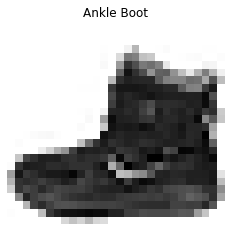

In [7]:
plot_fmnist_image(X_full, y_full, 0)

In [8]:
clear_session()

# Deep model
input1 = Input(shape=[28, 28])
flatten1 = Flatten(input_shape=[28, 28])(input1)
dense1 = Dense(100, activation=relu)(flatten1)
dense2 = Dense(50, activation=relu)(dense1)
output1 = Dense(10, activation=softmax)(dense2)

deep_model = Model(inputs=[input1], outputs=[output1])

# Wide and Deep model
# input1 = Input(shape=[28, 28])
# flatten1 = Flatten(input_shape=[28, 28])(input1)
# dense1 = Dense(200, activation=relu)(flatten1)
# dense2 = Dense(200, activation=relu)(dense1)
# concat1 = Concatenate()([flatten1, dense2])
# output1 = Dense(10, activation=softmax)(concat1)
#
# wide_and_deep_model = Model(inputs=[input1], outputs=[output1])

2021-11-06 13:44:07.673370: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-06 13:44:07.674161: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.


In [9]:
model = deep_model
# model = wide_and_deep_model

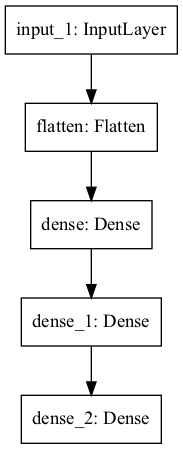

In [10]:
plot_model(model)

In [11]:
model.compile(
    optimizer=SGD(learning_rate=0.001),
    loss=sparse_categorical_crossentropy,
    metrics=["accuracy"]
)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Callbacks
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = TensorBoard(get_tensorboard_log_dir(), profile_batch=0)

In [ ]:
history = model.fit(X_full, y_full, epochs=100, validation_split=0.1, callbacks=[early_stopping_cb, tensorboard_cb])

Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 10s 192us/sample - loss: 1.5863 - accuracy: 0.5106 - val_loss: 1.0985 - val_accuracy: 0.6758

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Learning Curve")
plt.grid(True)
plt.gca().set_ylim((0, 1))
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred

In [ ]:
np.array(class_names)[y_pred]

In [ ]:
plot_fmnist_image(X_new, y_pred, 0)

In [ ]:
plot_fmnist_image(X_new, y_pred, 1)

In [ ]:
plot_fmnist_image(X_new, y_pred, 2)